# Titanic Passengers Characteristics On Their Rate Of Survival
## By Agboola Quam

## Investigation Overview

> In this investigation, I wanted to look at the characteristics of titanic passengers characteristics that could be used to predict their rate of survival.

## Dataset Overview

### TITANIC DATA DESCRIPTION

**We have 889 passengers that board the titanic, and the attributes of each passengers include:**

(1) passengerid = the passengers id

(2) survived = whether the passengers survived or not (0-not survived, 1-survived)

(3) pclass = passenger ticket class (1-high class, 2-middle class, 3-low class)

(4) name,sex,age = the name, gender =, and age of passengers

(5) ticket, fare, cabin, embarked = the ticket, the amount paid, cabin, and in embarks

(6) sibsp = the number of siblings and spouse each passengers have on board

(7) parch = the number of parents and children each passengers have on board

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe, 
titanic = pd.read_csv('titanic.csv')
titanic.sample(10)

PassengerId  Survived  Pclass  \
184          185         1       3   
884          885         0       3   
290          291         1       1   
578          579         0       3   
586          587         0       2   
218          219         1       1   
36            37         1       3   
674          675         0       2   
473          474         1       2   
362          363         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
184           Kink-Heilmann, Miss. Luise Gretchen  female   4.0      0      2   
884                        Sutehall, Mr. Henry Jr    male  25.0      0      0   
290                  Barber, Miss. Ellen "Nellie"  female  26.0      0      0   
578              Caram, Mrs. Joseph (Maria Elias)  female   NaN      1      0   
586                       Jarvis, Mr. John Denzil    male  47.0      0      0   
218                         Bazzani, Miss. Albina  female  32.0      0      0   
36                               Mamee, Mr. Hanna    male   NaN      0      0   
674                    Watson, Mr. Ennis Hastings    male   NaN      0      0   
473  Jerwan, Mrs. Amin S (Marie Marthe Thuillard)  female  23.0      0      0   
362               Barbara, Mrs. (Catherine David)  female  45.0      0      1   

              Ticket     Fare Cabin Embarked  
184           315153  22.0250   NaN        S  
884  SOTON/OQ 392076   7.0500   NaN        S  
290            19877  78.8500   NaN        S  
578             2689  14.4583   NaN        C  
586           237565  15.0000   NaN        S  
218            11813  76.2917   D15        C  
36              2677   7.2292   NaN        C  
674           239856   0.0000   NaN        S  
473  SC/AH Basle 541  13.7917     D        C  
362             2691  14.4542   NaN        C

## Distribution of Survival Rate

It can be seen that a lot of people didn't survive the titanic crash (549 passebgers didn't survived while 340 passengers survived). That is, the rate of a passenger surviving the titanic was 61.8% while the rate of a titanic not surviving the titanic was 35.1%

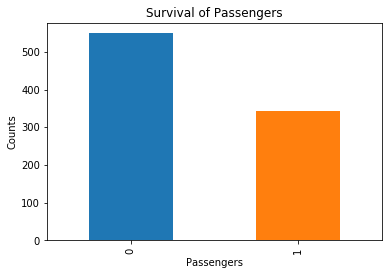

In [3]:
titanic.Survived.value_counts().plot(kind='bar',title='Survival of Passengers',color=['C0','C1']);
plt.xlabel('Passengers')
plt.ylabel('Counts');

In [4]:
#droping the cabin, passengerid, name, ticket column from our dataset because it's not useful for analysis
titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [5]:
#Fillin in the missing value and rechecking the dataset info
titanic.fillna(titanic.mean(),inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [6]:
#dropping the rows in embarked that are missing and rechecking the data info
titanic.dropna(inplace=True);
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


## CHECKING THE RELATIONSHIP BETWEEN OUR PREDICTOR VARIABLES AND THE OUTCOME VARIABLE(SURVIVED)

## Distribution of the Passengers Age and Fare

- Checking the distribution of the passengers ages and the amount they paid for ticket 
- And also checking the relationship between age and fare using the scatter plot

The fare distribution is skewed to the left, indicating most people paid less for the titanic ticket, while age was approximately normally distributed.

And there was a weak positive relationship between fare and age (0.089)


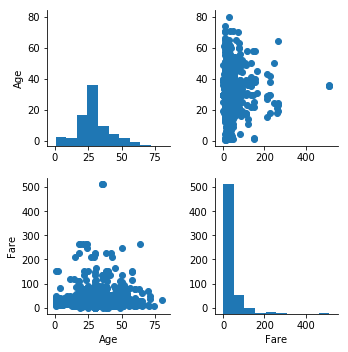

In [7]:
numeric_vars = ['Age', 'Fare']
categoric_vars = ['Survived', 'Pclass', 'Sex','Sibsp','Parch','Embarked']
g = sb.PairGrid(data = titanic, vars=numeric_vars)
g = g.map_diag(plt.hist, bins = 10);
g.map_offdiag(plt.scatter);



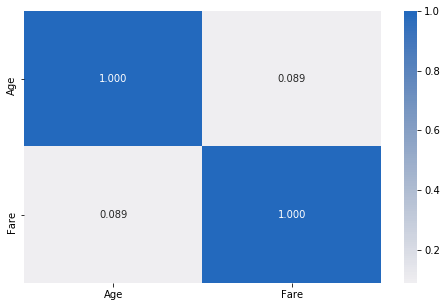

In [8]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(titanic[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

## FARE VS SURVIVED

**This shows that the chance of people surviving actually depends on the price they paid for the titanic ticket, where most people who survived paid more fare and most people that didnt survive paid lesser fee (i.e. passengers that paid high fares are more likely to survive than those who paid low fare).**


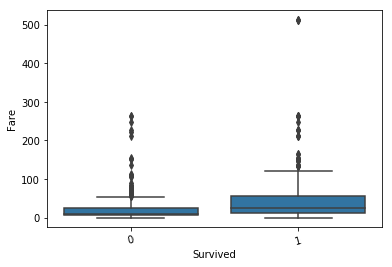

In [9]:
#Plotting a box plots for relationship between quantitative(fare) and qualitative variable(survived)
base_color=sb.color_palette()[0]
sb.boxplot(data=titanic,x='Survived',y='Fare',color=base_color);
plt.xticks(rotation=15);

## PCLASS VS SURVIVED

**This shows that the chance of people surviving actually depends on the the class they paid for, where most people who survived were in high class, while most people that didnt survive were in low class (i.e. passengers that are in high class are more likely to survive than those who are in low class).**

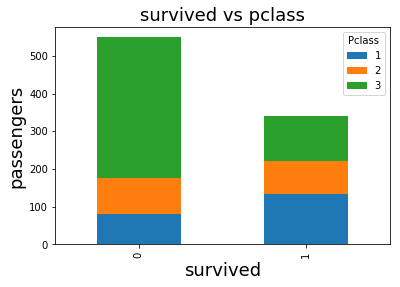

In [10]:
#plotting stacked bar chart of survived vs pclass
#grouping two categorical variables together(survived and pclass)
bys=titanic.groupby("Survived").Pclass.value_counts()
bys.unstack().plot(kind='bar',stacked=True);
plt.title('survived vs pclass',fontsize=18)
plt.xlabel('survived',fontsize=18)
plt.ylabel('passengers',fontsize=18);

## AGE VS SURVIVED

**I compared the distribution of Age for the passengers who survived and didn't survive**

It does look like the really young children have a higher chance of surviving than other ages

- Therefore, age depends on surviving or not 

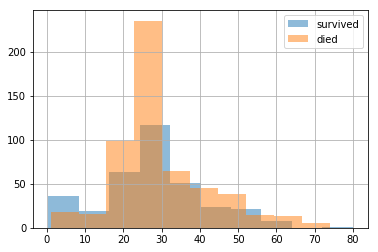

In [11]:
survive=titanic.Survived==True
died=titanic.Survived==False

titanic.Age[survive].hist(alpha=0.5,label='survived')
titanic.Age[died].hist(alpha=0.5,label='died')
plt.legend();

## sibsp vs survived

**Comparing the distribution of having family (siblings and spouse) on board is associated with survival**

**From our result;**

- A lot of people who have lots of families didn't appear to be surviving
- Passengers who have one(1) survived more by a little bit
- And majority of passengers who are alone (i.e. 0(zer0)) didn't appear to be surviving, probably most of the passengers are in this category (0-alone)

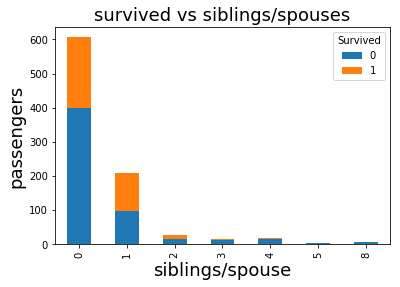

In [12]:
#grouping two variables together(survived and sibsp)
bysib=titanic.groupby("SibSp").Survived.value_counts()
#plotting stacked bar chart of survived vs siblings/spouses
bysib.unstack().plot(kind='bar',stacked=True);
plt.title('survived vs siblings/spouses',fontsize=18)
plt.xlabel('siblings/spouse',fontsize=18)
plt.ylabel('passengers',fontsize=18);

## parch vs survived

**Comparing the distribution of having family (parent and children) on board is associated with survival**

**From our result;**

- A lot of people who have lots of families didn't appear to be surviving
- Passengers who have one(1) survived more by a little bit
- And majority of passengers who are alone (i.e. 0(zer0)) didn't appear to be surviving, probably most of the passengers are in this category (0-alone)

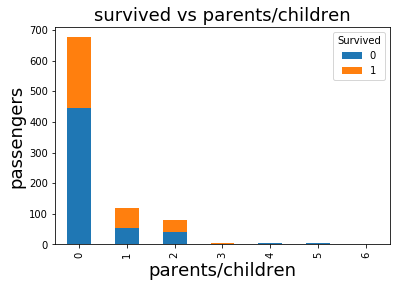

In [13]:
#grouping two variables together(survived and parch)
bypar=titanic.groupby("Parch").Survived.value_counts()
#plotting stacked bar chart of survived vs parent/children
bypar.unstack().plot(kind='bar',stacked=True);
plt.title('survived vs parents/children',fontsize=18)
plt.xlabel('parents/children',fontsize=18)
plt.ylabel('passengers',fontsize=18);


## EMBARKED VS SURVIVED
**Where the passengers were currently when they add impact with the iceberg and their chances of survival**

- We can see from our plot that the passengers in the S category seemed to be not having as much luck
- Passengers in C category seemed a little bit better
- And passengers in category Q is not that great too
**In general, embarked seem to have some association with the chance of survival**

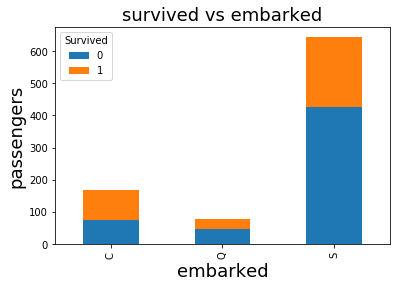

In [14]:
#grouping two variables together(survived and embarked)
byemb=titanic.groupby("Embarked").Survived.value_counts()
#plotting stacked bar chart of survived vs embarked
byemb.unstack().plot(kind='bar',stacked=True);
plt.title('survived vs embarked',fontsize=18)
plt.xlabel('embarked',fontsize=18)
plt.ylabel('passengers',fontsize=18);



## SURVIVED BY FARE AND PCLASS FOR THE PASSENGERS

I extended my investigation of fare against pclass and survival in this section by looking at the impact of fare and pclass against the chance of survival. The multivariate exploration here showed that there indeed is a positive effect of increased survival rate on the fare passengers paid for ticket.

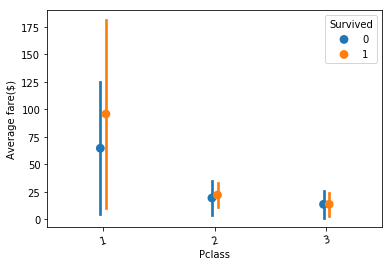

In [15]:
# multivariate plot of fare by pclass and survived
#Fare by survived and pclass using box plot

sb.pointplot(data=titanic,x='Pclass',y='Fare',hue='Survived',ci='sd',linestyles=" ",dodge=True);
plt.xticks(rotation=15)
plt.ylabel('Average fare($)');

## SURVIVED BY AGE AND PCLASS FOR THE PASSENGERS

I extended my investigation of the passengers age against pclass and survival in this section by looking at the impact of passengers average age and pclass against the chance of survival. The multivariate exploration here showed that there indeed a  relationship between these three variables.

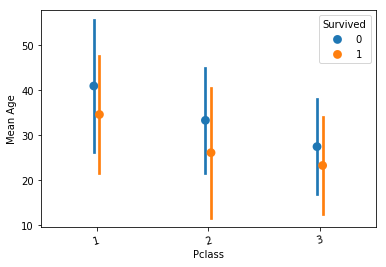

In [16]:
sb.pointplot(data=titanic,x='Pclass',y='Age',hue='Survived',ci='sd',linestyles=" ",dodge=True);
plt.xticks(rotation=15)
plt.ylabel('Mean Age');